In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from trackml.dataset import load_event
import kaggleHelpers as kH
from trackml.score import score_event


In [2]:
hits, cells, particles, truth = load_event('kaggleData/train_100_events/event000001001')
kH.procssParticles(particles)

/Users/johnda/MachineLearning/TrackingToy/kaggleHelpers.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  parts["phi"][(parts["phi"] <0)] = (parts["phi"] + 2*np.pi)
/Users/johnda/MachineLearning/TrackingToy/kaggleHelpers.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  parts["theta"][(parts["theta"] <0)] = (parts["theta"] + 2*np.pi)


In [3]:
detData = pd.read_csv("../trackingml/detectors.csv")

In [4]:
detGeo = kH.makeKaggleDetector(detData)

In [247]:
parts0GeV = particles[(particles["nhits"] > 7)]
#parts5GeV = particles[(particles["pt"]>3) & (particles["nhits"] > 7)]
parts5GeV = particles[(particles["pt"]>0.5)]
curvRange = 10*1.33*1e-4  # 0.5 GeV
#curvRange = 45*1.33*1e-4
doTruth = False

In [242]:
parts5GeV.head()


particle_id        vx        vy      vz         px         py  \
0  4503668346847232 -0.003686  0.013468 -6.5032  67.819000 -36.701900   
1  4503805785800704 -0.003686  0.013468 -6.5032  -3.009700  10.662300   
2  4504149383184384 -0.003686  0.013468 -6.5032  -4.913840 -12.453700   
3  4504286822137856 -0.003686  0.013468 -6.5032   0.258638  -0.509724   
4  4504355541614592 -0.003686  0.013468 -6.5032  -1.474890  -0.296320   

          pz  q  nhits         pt             rc       phi     theta       eta  
0 -25.516199 -1     11  77.113205  135146.734375  5.787144  1.890349 -0.325134  
1  37.389702  1     11  11.078941   19416.685547  1.845913  0.288068  1.930757  
2 -58.793301  1     11  13.388072   23463.611328  4.336574  2.917696 -2.185529  
3  -9.905410  1     13   0.571587    1001.750305  5.181946  3.083952 -3.546396  
4 -40.334400 -1     12   1.504362    2636.509277  3.339863  3.104313 -3.982330

In [243]:
#hits[(hits["particle_id"] == 13515609245483008)].head(12)
hits.head()

hit_id          x         y       z  volume_id  layer_id  module_id
0       1 -69.271698 -0.812497 -1502.5          7         2          1
1       2 -73.308998 -8.302350 -1502.5          7         2          1
2       3 -63.816799 -5.599270 -1502.5          7         2          1
3       4 -72.125801 -9.713870 -1502.5          7         2          1
4       5 -93.487503 -0.685854 -1502.5          7         2          1

/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:39: RuntimeWarning: invalid value encountered in sqrt
  yp = yc+np.sqrt(r**2-(x-xc)**2)
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:41: RuntimeWarning: invalid value encountered in sqrt
  ym = yc-np.sqrt(r**2-(x-xc)**2)


KeyboardInterrupt: 

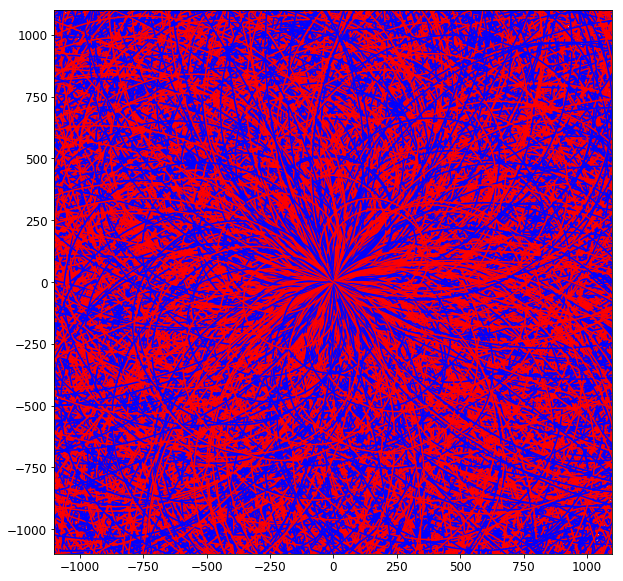

In [231]:
from TrackHelper import drawTrackXY, drawTrackZR,drawTrack

fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)
#plt.plot(hits["x"],hits["y"],'ro')

for index, row in parts5GeV.iterrows():

    drawTrackXY(float(row["rc"]),float(row["phi"]),float(row["q"]),scale=1000)


fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 3000
ax.set_xlim((-zoom, zoom))
ax.set_ylim((0, zoom/2))

detGeo.drawDetectorZR(ax,True)

for index, row in parts5GeV.iterrows():
    drawTrackZR(row["theta"],row["vz"],row["q"],np.sign(row["pz"])*zoom)


In [244]:
parts5GeV["eta"]

0      -0.325134
1       1.930757
2      -2.185529
3      -3.546396
4      -3.982330
6       1.473871
7       0.482748
8      -0.388666
10      1.920512
11     -0.592236
13      2.058111
14      1.512844
15      1.252582
16      1.316289
17      1.473162
18      0.900280
19      0.699846
20     -2.791886
21     -1.361925
22     -2.058517
23     -1.781042
24     -0.442502
25      0.674863
27      1.798007
28      3.474823
29      3.012962
31      1.290031
33      0.820089
34      0.603846
35      1.948701
          ...   
8803    2.441407
8807   -0.338192
8808   -2.748450
8827   -0.361419
8830   -3.219088
8831   -3.072644
8836   -3.349019
8838   -1.391906
8839   -1.164555
8840   -1.266956
8841   -1.605157
8845   -0.750090
8847   -1.068944
8859   -1.411478
8862    3.282865
8863    1.984321
8864   -3.028859
8865   -2.289684
8878   -1.285146
8880    2.197595
8884   -0.514408
8888   -3.989352
8889    0.932850
8890    2.966673
8902    1.537978
8904   -0.170260
8911   -1.131763
8912   -1.5794

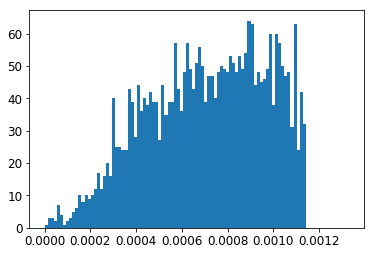

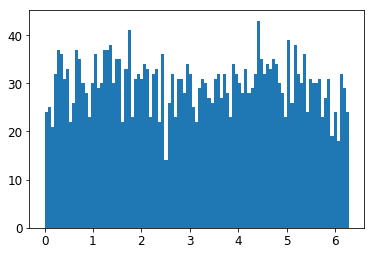

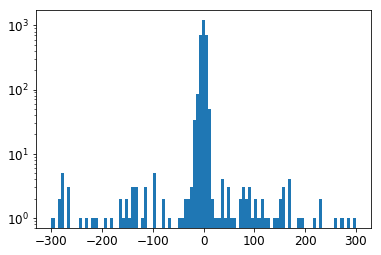

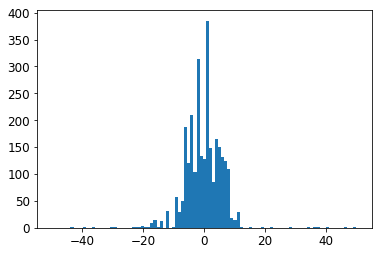

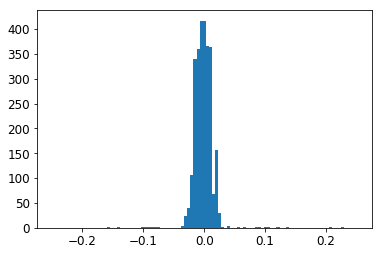

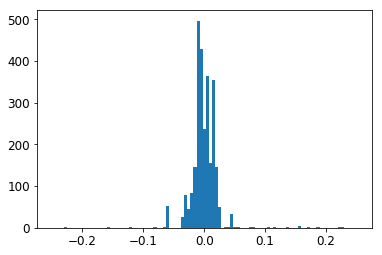

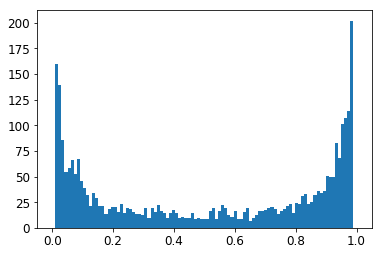

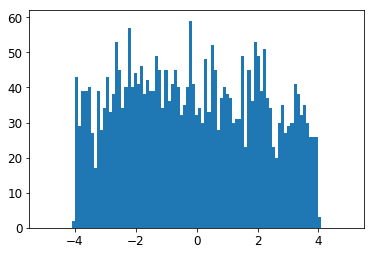

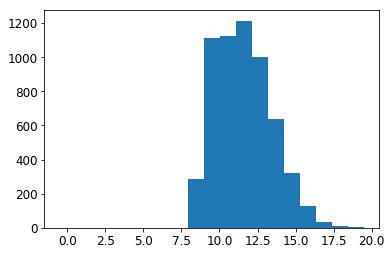

In [246]:
plt.hist(1./parts5GeV["rc"],bins=np.linspace(0*1e-3,10*1.33*1e-4,100))
plt.show()
plt.hist(parts5GeV["phi"],bins=np.linspace(0,2*np.pi,100))
plt.show()
plt.hist(parts5GeV["vz"],bins=np.linspace(-300,300,100))
plt.yscale('log')
plt.show()
plt.hist(parts5GeV["vz"],bins=np.linspace(-50,50,100))
plt.show()

plt.hist(parts5GeV["vx"],bins=np.linspace(-0.25,0.25,100))
plt.show()
plt.hist(parts5GeV["vy"],bins=np.linspace(-0.25,0.25,100))
plt.show()
plt.hist(parts5GeV["theta"]/np.pi,bins=np.linspace(0,1,100))
plt.show()

plt.hist(parts5GeV["eta"],bins=np.linspace(-5,5,100))
plt.show()

plt.hist(parts0GeV["nhits"],bins=np.linspace(-0.5,19.5,20))
plt.show()

# Get Truth Hits

In [248]:
# Kaggle formats
eventParticles = []
eventTruth = []
eventHits = []

# For plotting 
solutions = []

hitID = 0

for index, row in parts5GeV.iterrows():
    
    phi   = row["phi"]
    q     = row["q"]
    rc    = row["rc"]
    z0    = row["vz"]
    theta = row["theta"]

    eventParticles.append((index,rc,phi,theta,z0,q,6))

    ps_hitXs, ps_hitYs, ps_hitZs, ps_hitRs, modulesHit, my_hits = detGeo.getHits3D(rc,phi,theta,z0,q)

    this_hits = []
    for index, row in truth[truth["particle_id"]==row["particle_id"]].iterrows():

        thisRealHit = hits[hits["hit_id"]==int(row["hit_id"])]
        elementID = (int(thisRealHit["volume_id"]),int(thisRealHit["layer_id"]),int(thisRealHit["module_id"]))
        if doTruth:
            this_hits.append((elementID,row["tx"],row["ty"],row["tz"]))
        else:
            this_hits.append((elementID,thisRealHit["x"],thisRealHit["y"],thisRealHit["z"]))
            
    solutions.append([ps_hitXs, ps_hitYs, ps_hitZs, ps_hitRs, rc, phi, theta, z0, q, modulesHit, this_hits])

    for hitsInfo in this_hits:
        hitX   = hitsInfo[1]        
        hitY   = hitsInfo[2]                
        hitZ   = hitsInfo[3]                
        eventTruth.append((hitID,index,hitX,hitY,hitZ,1.0))
        eventHits .append((hitID,hitX,hitY,hitZ,hitsInfo[0][0],hitsInfo[0][1],hitsInfo[0][2]))        
        hitID += 1

/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:136: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:137: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_pm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_p_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:138: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mp = abs(yints_raw-trk_yc+np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:139: RuntimeWarning: invalid value encountered in sqrt
  closure_raw_mm = abs(yints_raw-trk_yc-np.sqrt(trk_rc2-(xints_m_raw-trk_xc)**2))
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:128: RuntimeWarning: invalid value encountered in sqrt
  xints_p_raw =  1*np.sqrt(cylR**2-yints_raw**2)
/Users/johnda/MachineLearning/TrackingToy/TrackHelper.py:129: R

In [249]:
recHits = np.array(eventHits)

#np.random.seed(42)
#shuffle_index = np.random.permutation(len(recHits))
#recHits = recHits[shuffle_index]
print(len(recHits))
recHits

32144


array([[ 0.00000000e+00,  2.81228008e+01, -1.52030001e+01, ...,
         8.00000000e+00,  2.00000000e+00,  1.03000000e+02],
       [ 1.00000000e+00,  6.36007004e+01, -3.43810997e+01, ...,
         8.00000000e+00,  4.00000000e+00,  2.06000000e+02],
       [ 2.00000000e+00,  1.01695000e+02, -5.49672012e+01, ...,
         8.00000000e+00,  6.00000000e+00,  3.34000000e+02],
       ...,
       [ 3.21410000e+04, -5.48101990e+02, -3.72544006e+02, ...,
         1.30000000e+01,  8.00000000e+00,  8.26000000e+02],
       [ 3.21420000e+04, -7.04109009e+02, -4.12937988e+02, ...,
         1.70000000e+01,  2.00000000e+00,  8.51000000e+02],
       [ 3.21430000e+04, -9.22606018e+02, -4.33299988e+02, ...,
         1.70000000e+01,  4.00000000e+00,  1.07500000e+03]])

In [250]:
#print(recHits[:,2])
x2s = np.array(recHits[:,1]**2,dtype=float)
y2s = np.array(recHits[:,2]**2,dtype=float)

Rs = np.sqrt(x2s + y2s)
Phis = np.arctan2(recHits[:,2],recHits[:,1])
Phis[Phis<0] = Phis[Phis<0] +2*np.pi

GlobalID = []
for hitIndx in range(len(recHits)):
    GlobalID.append(detGeo.getGlobalLayerID(int(recHits[hitIndx][4]),int(recHits[hitIndx][5])))
GIDs = np.array(GlobalID,dtype=int)

recHitsNew = np.c_[recHits,GIDs,Rs,Phis]
recHitsNew[0:10]

array([[   0.        ,   28.12280083,  -15.20300007,  -17.08110046,
           8.        ,    2.        ,  103.        ,    0.        ,
          31.9690966 ,    5.78759274],
       [   1.        ,   63.60070038,  -34.3810997 ,  -30.43129921,
           8.        ,    4.        ,  206.        ,    1.        ,
          72.29874899,    5.78760513],
       [   2.        ,  101.69499969,  -54.96720123,  -44.75899887,
           8.        ,    6.        ,  334.        ,    2.        ,
         115.59959418,    5.78765699],
       [   3.        ,  151.01100159,  -81.57160187,  -63.29339981,
           8.        ,    8.        ,  501.        ,    3.        ,
         171.63405499,    5.78792049],
       [   4.        ,  229.71400452, -124.01200104,  -92.80000305,
          13.        ,    2.        ,  377.        ,    4.        ,
         261.05076187,    5.78816517],
       [   5.        ,  316.06399536, -170.42300415, -125.19999695,
          13.        ,    4.        ,  528.        ,    5

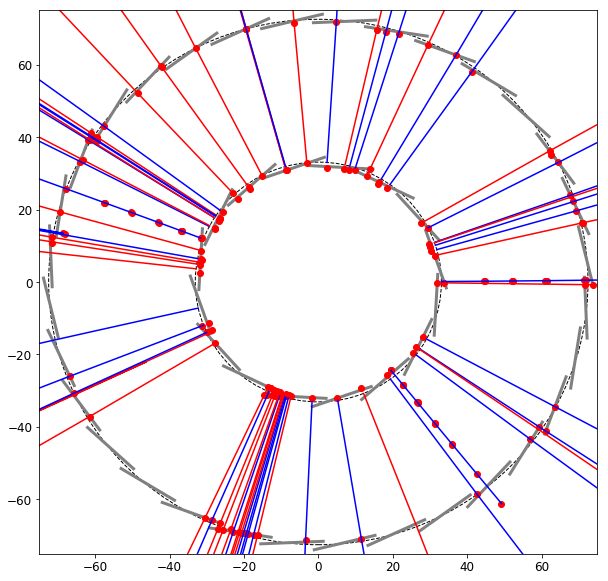

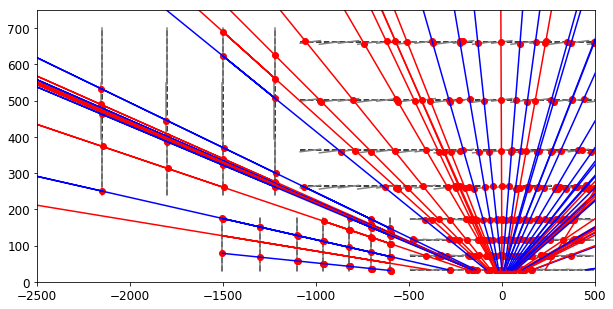

In [189]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 75
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)
plt.plot(recHits[:,1],recHits[:,2],'ro')

for s in solutions:
    color = "b" if (s[8] < 0) else "r"
    plt.plot(s[0],s[1],color)

fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 1500
center = (-1000,0)
ax.set_xlim((center[0]-zoom, center[0]+zoom))
ax.set_ylim((center[1], center[1]+zoom/2))

detGeo.drawDetectorZR(ax,True)

plt.plot(recHits[:,3],np.sqrt(recHits[:,2]**2+recHits[:,1]**2),'ro')
for s in solutions:
    color = "b" if (s[8] < 0) else "r"
    plt.plot(s[2],s[3],color)

7.0
10.0


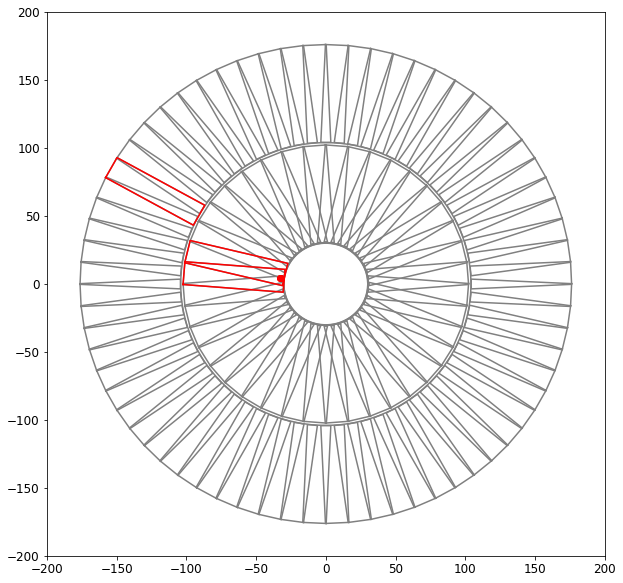

In [190]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 200
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

print(detGeo.disks[4].volume_id)
print(detGeo.disks[4].layer_id)
detGeo.disks[0].drawDiskXY()
detGeo.drawDiskModulesXY([(7,4,100),(7,4,104),(7,4,106)])



xs = [-3.26870995e+01,-3.24840012e+01,-3.26870995e+01]
ys = [4.42403984e+00,4.38718987e+00,4.42403984e+00]
plt.plot(xs,ys,"ro")

#modList = [(32, 81, 18.0, 2.0, 82.0)]
#print(modulesHit)
#print(detGeo.getLayerOrDisk(modulesHit[10]))
#detGeo.drawDiskModulesXY([modulesHit[10]])

In [251]:
from HTTrackFinder import HTTrackFinding

In [252]:
# given global posision and z0 range, return consistent theta
def getHT_ZRForTracking(hitZ, hitR, z):
    #f = np.arctan2((hitZ - z),hitR)
    #f[f<0] = f[f<0]+2*np.pi
    f = np.arctan2(hitR,(hitZ - z))
    return f

In [253]:
# given global posision and z0 range, return consistent theta
def getHT_ZRForTrackingEta(hitZ, hitR, z):
    #f = np.arctan2((hitZ - z),hitR)
    #f[f<0] = f[f<0]+2*np.pi
    theta = np.arctan2(hitR,(hitZ - z))
    eta = -np.log(np.tan(theta/2))
    return eta

In [254]:
def getHTForTrackFinding(hitR,hitPhi,phi):
    #Convert 0-2Pi
    if hitPhi<0: hitPhi += 2*np.pi
    phi_circle = phi - np.pi/2
    return 2/hitR*(np.cos(hitPhi-phi_circle))

In [255]:

HTFinderZThetaCoarse = HTTrackFinding(-50,50,2,-4,4,40,getHTFunction=getHT_ZRForTrackingEta,
                                      nLayers=(len(detGeo.layers)+len(detGeo.disks)),
                                      minHitsPerTrack=3)


#
# Loop on rec hits
# 
for hitInfo in recHits:
    
    # (hitID,hitX,hitY,hitZ,hitZ,hitLay,hitPhi)) 
    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    hitZ   = hitInfo[3]        

    hitVolID = int(hitInfo[4])
    hitLayID = int(hitInfo[5])    
    globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)

    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    HTFinderZThetaCoarse.addHit(globalLayID, hitID, hitZ, hitR,doRangeCut=False)



HTFinderZThetaCoarse.combineLayerMaps()

In [256]:
matchedHits = HTFinderZThetaCoarse.getHitsInBin(0,1,recHits)
len(matchedHits)

1366

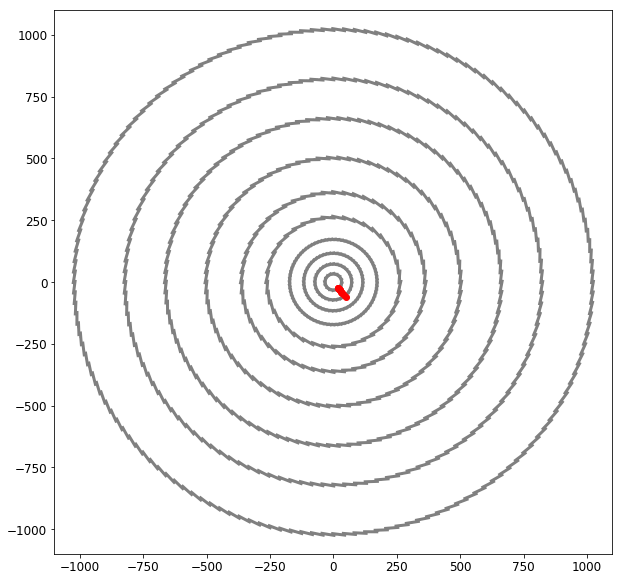

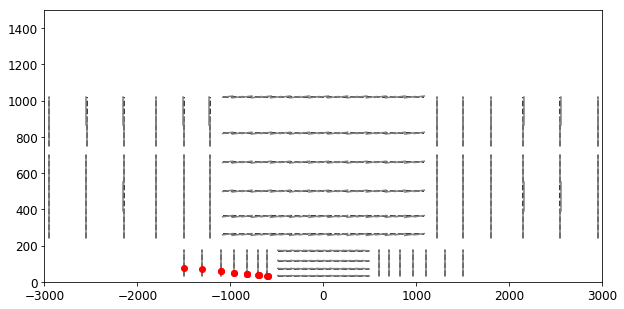

In [197]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 1100
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)
plt.plot(matchedHits[:,1],matchedHits[:,2],'ro')

fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 3000
ax.set_xlim((-zoom, zoom))
ax.set_ylim((0, zoom/2))

detGeo.drawDetectorZR(ax,True)

plt.plot(matchedHits[:,3],np.sqrt(matchedHits[:,2]**2+matchedHits[:,1]**2),'ro')

In [257]:
recHitsSlim = np.c_[recHitsNew[:,0],recHitsNew[:,7],recHitsNew[:,8],recHitsNew[:,9]]
print(recHitsNew[0:2])
print()
print(recHitsSlim[0:2])

[[  0.          28.12280083 -15.20300007 -17.08110046   8.
    2.         103.           0.          31.9690966    5.78759274]
 [  1.          63.60070038 -34.3810997  -30.43129921   8.
    4.         206.           1.          72.29874899   5.78760513]]

[[ 0.          0.         31.9690966   5.78759274]
 [ 1.          1.         72.29874899  5.78760513]]


In [258]:
def doRoadFinding(HTFinderZThetaCoarse,allRecoRoads,allFitTracks,minNHits,chi2Cut=1):
    import time
    start = time.time()
    printTimes = False
    HTFinderPtPhiFine = HTTrackFinding(0,2*np.pi,200,-1*curvRange,curvRange,400,
                                       getHTFunction=getHTForTrackFinding,
                                       nLayers=(len(detGeo.layers)+len(detGeo.disks)),
                                       minHitsPerTrack=minNHits)

    
    for iX in range(HTFinderZThetaCoarse.nXBins-1):
        for iY in range(HTFinderZThetaCoarse.nYBins-1):
            startGetHits = time.time()
            thisMatchedHits = HTFinderZThetaCoarse.getHitsInBin(iX,iY,recHitsSlim)
            endGetHits = time.time()
            if printTimes: print("\tgetHits:",endGetHits - startGetHits)        
                
            thisZ0    = HTFinderZThetaCoarse.HitDB.getXCenter(iX)
            thisTheta = HTFinderZThetaCoarse.HitDB.getYCenter(iY) 
            
            if len(thisMatchedHits) < 5: continue
                
            startConstructor = time.time()
            HTFinderPtPhiFine.clear()
            endConstructor = time.time()                                           
            if printTimes: print("\tclear:",endConstructor - startConstructor)        
            
            #
            # Loop on rec hits
            # 
            startHitLoop = time.time()
            for hitInfo in thisMatchedHits:

                hitID  = hitInfo[0]
                globalLayID = int(hitInfo[1])
                hitR   = hitInfo[2] 
                hitPhi   = hitInfo[3]            
                
                HTFinderPtPhiFine.addHit(globalLayID, hitID, hitR, hitPhi)  
            endHitLoop = time.time()        
            if printTimes: print("\thit Loop:",endHitLoop - startHitLoop)        
            
            startCombLay = time.time()        
            HTFinderPtPhiFine.combineLayerMaps()
            endCombLay = time.time()        
            if printTimes: print("\tcombineLayer:",endCombLay - startCombLay)        
            
            startFindTracks = time.time()        
            recoRoads = HTFinderPtPhiFine.findTracks(overlapLogicFirstHit=False)
            endFindTracks = time.time()        
            if printTimes: print("\tfindTracks:",endFindTracks - startFindTracks)        
            
            #
            #  Add the Z0 and theta measurements
            #
            for r in recoRoads:
                r[0].append(thisZ0)
                r[0].append(thisTheta)
            
            allRecoRoads += recoRoads
            startRemoveHits = time.time()        
            
            #
            #   Track Fitting
            #
            fitTracks3DIter = HTFinderPtPhiFine.fitTracks3DIter(recoRoads,recHitsNew,chi2Cut=chi2Cut,
                                                                hitRIndex=8, hitPhiIndex=9, hitZIndex=3,
                                                                addRoadIndx=False)
            
            allFitTracks += fitTracks3DIter
            for fT in fitTracks3DIter:
                HTFinderZThetaCoarse.removeHitsFromFitTrack(fT)
            endRemoveHits = time.time()        
            if printTimes: print("\tremoveHits:",endRemoveHits - startRemoveHits)        
            
            print("One Iter:",endRemoveHits - startGetHits)        
            print(iX,iY,len(recoRoads),len(fitTracks3DIter),len(thisMatchedHits)
              ,"-->",len(HTFinderZThetaCoarse.getHitsInBin(iX,iY,recHitsSlim)))
            #break
        #break
        

    end = time.time()
    print("================")
    print("total time:",end - start)   

In [259]:
allRecoRoads = []
allFitTracks = []
doRoadFinding(HTFinderZThetaCoarse,allRecoRoads,allFitTracks,minNHits=8,chi2Cut=5)
print(len(allRecoRoads),len(allFitTracks))

One Iter: 3.6426212787628174
0 0 0 0 1002 --> 1002
One Iter: 4.376193046569824
0 1 0 0 1366 --> 1366
One Iter: 3.9270012378692627
0 2 0 0 1184 --> 1184
One Iter: 4.550531625747681
0 3 9 6 816 --> 772
One Iter: 8.326269149780273
0 4 63 20 1031 --> 843
One Iter: 11.406146049499512
0 5 87 26 1205 --> 1018
One Iter: 18.875399827957153
0 6 134 16 1548 --> 1424
One Iter: 17.511361837387085
0 7 121 22 1668 --> 1515
One Iter: 20.861042261123657
0 8 142 16 1817 --> 1739
One Iter: 17.597582817077637
0 9 95 7 1777 --> 1715
One Iter: 20.642401218414307
0 10 97 2 1904 --> 1887
One Iter: 20.381901025772095
0 11 109 7 2106 --> 2046
One Iter: 23.744720935821533
0 12 126 12 2409 --> 2298
One Iter: 23.926883935928345
0 13 156 17 2703 --> 2587
One Iter: 23.919969081878662
0 14 147 6 2888 --> 2838
One Iter: 32.01854586601257
0 15 209 17 3261 --> 3112
One Iter: 34.648603200912476
0 16 224 15 3396 --> 3317
One Iter: 34.88068509101868
0 17 230 12 3529 --> 3435


/Users/johnda/Library/Python/3.6/lib/python/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 600.
  warnings.warn(errors[info][0], RuntimeWarning)


One Iter: 39.65330934524536
0 18 267 3 3695 --> 3670


/Users/johnda/MachineLearning/TrackingToy/HTTrackFinder.py:35: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(x*p[1]/2)+p[0]-np.pi/2


One Iter: 32.24595093727112
0 19 236 0 3641 --> 3641
One Iter: 32.99963307380676
0 20 208 3 3590 --> 3565
One Iter: 38.464812994003296
0 21 268 17 3642 --> 3542
One Iter: 32.76052117347717
0 22 223 19 3379 --> 3246
One Iter: 26.091458797454834
0 23 165 9 2942 --> 2862
One Iter: 25.309441089630127
0 24 162 12 2709 --> 2593
One Iter: 17.54821515083313
0 25 99 12 2289 --> 2181
One Iter: 17.636064052581787
0 26 99 13 2128 --> 2019
One Iter: 18.449743032455444
0 27 100 6 1946 --> 1891
One Iter: 19.56050682067871
0 28 125 3 1940 --> 1916
One Iter: 19.972575902938843
0 29 131 4 1917 --> 1877
One Iter: 15.766471147537231
0 30 106 5 1622 --> 1586
One Iter: 12.451304197311401
0 31 79 8 1212 --> 1133
One Iter: 10.25378680229187
0 32 72 4 1046 --> 1010
One Iter: 10.802202939987183
0 33 87 13 1094 --> 1000
One Iter: 9.112226009368896
0 34 64 5 1045 --> 1010
One Iter: 4.54491400718689
0 35 11 1 1109 --> 1095
One Iter: 4.228632926940918
0 36 0 0 1265 --> 1265
One Iter: 3.620837926864624
0 37 0 0 1102

In [260]:
doRoadFinding(HTFinderZThetaCoarse,allRecoRoads,allFitTracks,minNHits=4,chi2Cut=5)
print(len(allRecoRoads),len(allFitTracks))

One Iter: 11.07225513458252
0 0 208 166 1002 --> 398
One Iter: 12.896195650100708
0 1 215 148 1096 --> 434
One Iter: 9.87853217124939
0 2 161 96 865 --> 428
One Iter: 6.586872100830078
0 3 115 61 602 --> 317
One Iter: 8.833506107330322
0 4 127 29 689 --> 571
One Iter: 12.191893815994263
0 5 178 19 954 --> 843
One Iter: 18.49800682067871
0 6 229 6 1295 --> 1260
One Iter: 20.76070284843445
0 7 246 2 1471 --> 1453
One Iter: 24.431421995162964
0 8 286 1 1699 --> 1690
One Iter: 24.033776998519897
0 9 253 0 1684 --> 1684
One Iter: 24.543158054351807
0 10 272 1 1813 --> 1805
One Iter: 26.905098915100098
0 11 279 0 1948 --> 1948
One Iter: 28.367619037628174
0 12 352 4 2202 --> 2176
One Iter: 35.23914909362793
0 13 379 3 2483 --> 2455


/Users/johnda/Library/Python/3.6/lib/python/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 600.
  warnings.warn(errors[info][0], RuntimeWarning)
/Users/johnda/MachineLearning/TrackingToy/HTTrackFinder.py:35: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(x*p[1]/2)+p[0]-np.pi/2


One Iter: 42.0037579536438
0 14 413 8 2671 --> 2618
One Iter: 44.66402316093445
0 15 468 4 2951 --> 2917
One Iter: 48.938029766082764
0 16 570 4 3146 --> 3106
One Iter: 49.23147892951965
0 17 537 3 3305 --> 3279
One Iter: 54.73062801361084
0 18 624 1 3543 --> 3535
One Iter: 46.53538799285889
0 19 653 0 3508 --> 3508
One Iter: 53.2589807510376
0 20 604 0 3403 --> 3403
One Iter: 49.92318105697632
0 21 598 2 3380 --> 3361
One Iter: 42.81170201301575
0 22 538 2 3108 --> 3092
One Iter: 34.624743938446045
0 23 417 3 2705 --> 2675
One Iter: 30.152313947677612
0 24 364 3 2470 --> 2448
One Iter: 22.7801411151886
0 25 285 6 2078 --> 2028
One Iter: 23.694509983062744
0 26 275 0 1939 --> 1939
One Iter: 23.9201180934906
0 27 319 0 1861 --> 1861
One Iter: 25.839908123016357
0 28 307 0 1889 --> 1889
One Iter: 26.632531881332397
0 29 337 0 1864 --> 1864
One Iter: 19.811577081680298
0 30 268 0 1540 --> 1540
One Iter: 14.895657062530518
0 31 187 3 1126 --> 1110
One Iter: 11.539774894714355
0 32 149 5 95

In [202]:
doRoadFinding(HTFinderZThetaCoarse,allRecoRoads,allFitTracks,minNHits=3,chi2Cut=5)
print(len(allRecoRoads),len(allFitTracks))

One Iter: 0.08725237846374512
0 7 0 0 13 --> 13
One Iter: 0.9406380653381348
0 8 14 5 62 --> 48
One Iter: 1.057554006576538
0 9 5 0 20 --> 20
One Iter: 0.23816299438476562
0 10 0 0 6 --> 6
One Iter: 0.22269296646118164
0 11 1 0 11 --> 11
One Iter: 0.2855110168457031
0 12 1 0 6 --> 6
One Iter: 0.29282116889953613
0 13 1 0 11 --> 11
One Iter: 0.26375603675842285
0 14 0 0 12 --> 12
One Iter: 0.38168883323669434
0 15 1 0 16 --> 16
One Iter: 0.4693410396575928
0 16 2 1 23 --> 19
One Iter: 0.6505122184753418
0 17 4 1 28 --> 24


/Users/johnda/Library/Python/3.6/lib/python/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 600.
  warnings.warn(errors[info][0], RuntimeWarning)


One Iter: 0.8478600978851318
0 18 7 0 28 --> 28
One Iter: 0.7893481254577637
0 19 7 0 34 --> 34
One Iter: 0.9345331192016602
0 20 8 0 41 --> 41
One Iter: 0.8326189517974854
0 21 5 0 37 --> 37
One Iter: 0.6700208187103271
0 22 2 0 25 --> 25
One Iter: 0.5537419319152832
0 23 2 0 19 --> 19
One Iter: 1.0619831085205078
0 24 7 0 23 --> 23
One Iter: 0.6268820762634277
0 25 3 0 26 --> 26
One Iter: 0.7810170650482178
0 26 6 0 35 --> 35
One Iter: 0.6306791305541992
0 27 2 0 23 --> 23
One Iter: 0.862419843673706
0 28 10 1 40 --> 36
One Iter: 0.6314618587493896
0 29 2 1 18 --> 15
total time: 18.92075228691101
257 68


In [270]:
def removeOverlappingHits(trackList,useNHits=True):
    solnsPreclean = HTFinderZThetaCoarse.getSolutionsFromTracks(trackList)
    nTracksPerHitPreClean = solnsPreclean["hit_id"].value_counts()
    multiTperH = nTracksPerHitPreClean[nTracksPerHitPreClean > 1]
    HTFinderZThetaCoarse.removeOverlap(trackList,multiTperH.index,useNHits=useNHits)

In [204]:
def printCounts(trackPerHit,nTrials=10):
    for i in range(nTrials):
        print(len(trackPerHit[trackPerHit > i]))



In [267]:
solnsFittedIterAll = HTFinderZThetaCoarse.getSolutionsFromTracks(allFitTracks)
nTracksPerHitIterAll = solnsFittedIterAll["hit_id"].value_counts()
printCounts(nTracksPerHitIterAll)


7593
632
44
0
0
0
0
0
0
0


In [266]:
removeOverlappingHits(allFitTracks)

In [207]:
allFitTracks[0]

[[2.9430576675835023,
  -0.00017003188810254733,
  -1.0,
  -1.0002589589348119,
  3.0258220677924235],
 [[642.0,
   643.0,
   630.0,
   631.0,
   632.0,
   633.0,
   634.0,
   635.0,
   636.0,
   637.0,
   638.0,
   639.0,
   640.0,
   641.0,
   645.0,
   646.0]],
 2.960811962515053,
 [0.0,
  0.0,
  10.0,
  10.0,
  11.0,
  11.0,
  12.0,
  12.0,
  13.0,
  13.0,
  14.0,
  15.0,
  16.0,
  16.0,
  25.0,
  26.0],
 [0.0539759587230194,
  0.05418670466985752,
  0.2067895524744029,
  0.310971963226592,
  0.26999622678860113,
  0.4172900096588702,
  0.007811153427193219,
  0.010423021992743748,
  0.023745898127756557,
  0.03234082832639265,
  0.06023653678293395,
  0.04957849033226061,
  0.5971032945552225,
  0.12114916810068313,
  0.4972057855138409,
  0.24800736981468302]]

In [263]:
roadsToRemove = []
for rFirstIndx in range(len(allFitTracks)):
    if rFirstIndx in roadsToRemove: continue
    thisRoad = allFitTracks[rFirstIndx]
    for rOtherIndx in range(rFirstIndx,len(allFitTracks)):
        if rOtherIndx == rFirstIndx: continue
        if thisRoad[1] == allFitTracks[rOtherIndx][1]:
            print("kill",rOtherIndx,"b/c of",rFirstIndx)
            roadsToRemove.append(rOtherIndx)
            
roadsToRemove.sort(reverse=True)

print(roadsToRemove)                

kill 3 b/c of 2
kill 20 b/c of 19
kill 22 b/c of 21
kill 49 b/c of 28
kill 66 b/c of 28
kill 67 b/c of 28
kill 89 b/c of 28
kill 100 b/c of 28
kill 101 b/c of 28
kill 102 b/c of 28
kill 145 b/c of 28
kill 173 b/c of 28
kill 182 b/c of 28
kill 283 b/c of 28
kill 306 b/c of 28
kill 374 b/c of 28
kill 382 b/c of 28
kill 383 b/c of 28
kill 398 b/c of 28
kill 399 b/c of 28
kill 411 b/c of 28
kill 431 b/c of 28
kill 432 b/c of 28
kill 440 b/c of 28
kill 441 b/c of 28
kill 443 b/c of 28
kill 444 b/c of 28
kill 445 b/c of 28
kill 446 b/c of 28
kill 450 b/c of 28
kill 451 b/c of 28
kill 454 b/c of 28
kill 455 b/c of 28
kill 456 b/c of 28
kill 457 b/c of 28
kill 458 b/c of 28
kill 459 b/c of 28
kill 469 b/c of 28
kill 470 b/c of 28
kill 471 b/c of 28
kill 472 b/c of 28
kill 473 b/c of 28
kill 474 b/c of 28
kill 475 b/c of 28
kill 476 b/c of 28
kill 477 b/c of 28
kill 478 b/c of 28
kill 484 b/c of 28
kill 485 b/c of 28
kill 490 b/c of 28
kill 491 b/c of 28
kill 492 b/c of 28
kill 493 b/c of 28
ki

kill 1234 b/c of 1233
kill 1240 b/c of 1239
kill 1244 b/c of 1243
kill 1248 b/c of 1247
kill 1252 b/c of 1251
kill 1255 b/c of 1254
kill 1256 b/c of 1254
kill 1257 b/c of 1254
kill 1279 b/c of 1278
kill 1291 b/c of 1290
kill 1294 b/c of 1293
kill 1317 b/c of 1316
kill 1329 b/c of 1328
kill 1332 b/c of 1331
kill 1334 b/c of 1333
kill 1339 b/c of 1338
kill 1356 b/c of 1355
kill 1360 b/c of 1359
kill 1365 b/c of 1364
kill 1373 b/c of 1372
kill 1379 b/c of 1378
kill 1381 b/c of 1380
kill 1386 b/c of 1385
kill 1391 b/c of 1390
kill 1394 b/c of 1393
kill 1396 b/c of 1395
kill 1398 b/c of 1397
kill 1401 b/c of 1400
kill 1409 b/c of 1408
kill 1411 b/c of 1410
kill 1413 b/c of 1412
kill 1415 b/c of 1414
kill 1417 b/c of 1416
kill 1427 b/c of 1426
kill 1428 b/c of 1426
kill 1430 b/c of 1429
kill 1434 b/c of 1433
[1438, 1437, 1436, 1435, 1434, 1432, 1431, 1430, 1428, 1427, 1425, 1424, 1423, 1422, 1421, 1420, 1419, 1418, 1417, 1415, 1413, 1411, 1409, 1401, 1398, 1396, 1394, 1391, 1386, 1381, 1379,

In [264]:
for dup in roadsToRemove:
    allFitTracks.pop(dup)

In [272]:
solnsFittedIter2 = HTFinderZThetaCoarse.getSolutionsFromTracks(allFitTracks)
nTracksPerHitIter2 = solnsFittedIter2["hit_id"].value_counts()
printCounts(nTracksPerHitIter2)

7593
0
0
0
0
0
0
0
0
0


In [271]:
removeOverlappingHits(allFitTracks,useNHits=False)

In [218]:
allFitTracks.pop(48)

[[0.004781523196047517,
  -6.143650702495437e-05,
  -1.0,
  6.219919206372998,
  0.07504854116553832],
 [[696.0,
   697.0,
   698.0,
   699.0,
   700.0,
   701.0,
   702.0,
   703.0,
   704.0,
   705.0,
   706.0,
   707.0,
   708.0]],
 2.885542403110003,
 [17.0,
  17.0,
  18.0,
  18.0,
  19.0,
  19.0,
  20.0,
  20.0,
  21.0,
  21.0,
  22.0,
  22.0,
  23.0],
 [0.3403089633703653,
  0.5580857232245028,
  0.6150969088090882,
  0.004122927613027649,
  0.28041186152704634,
  0.3651073430803484,
  0.20155123769946004,
  0.16349367082101451,
  0.04345071592574471,
  0.04034040809856844,
  0.013584986312945102,
  0.10320266136461971,
  0.15678499526327205]]

In [273]:
from TrackHelper import getTruthDF
my_truth = getTruthDF(eventTruth)

In [274]:
from trackml.score import score_event
#print(score_event(truth,solnsCleaned))
print(score_event(my_truth,solnsFittedIter2))

0.21350796416127427


KeyboardInterrupt: 

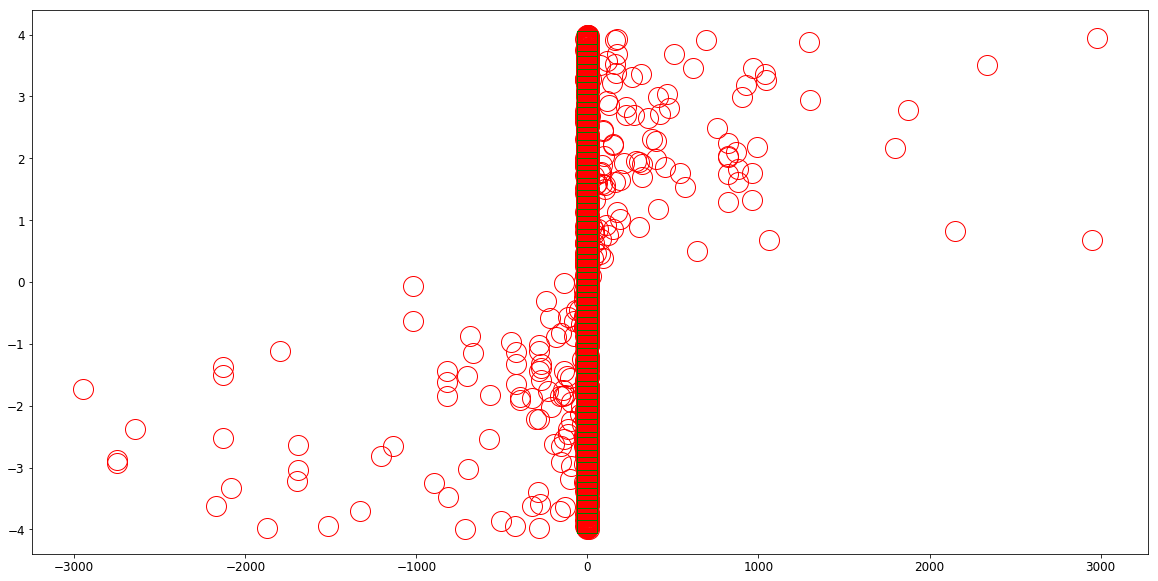

In [275]:
plt.figure(1, figsize=(20, 10))
plt.figure(2, figsize=(20, 10))

#    
# Plot Truth
#
for part in eventParticles:
    # part format (trkI,pt,phi,theta,z0,q,6)
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]   
    trueZ0  = part[4]    
    trueTheta  = part[3]
    trueEta = -np.log(np.tan(trueTheta/2))
    #eventParticles.append((trkI,pt,phi,q,6))

    plt.figure(1)
    plt.plot(truePhi,trueQ*1/trueRc,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')

    plt.figure(2)
    plt.plot(trueZ0,trueEta,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')


#
#  Roads
#
for rT in allRecoRoads:
    recPhi, recCurv, recQ, recZ0, recTheta  = rT[0]

    plt.figure(1)
    plt.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='g',markerfacecolor='None')

    plt.figure(2)
    plt.plot(recZ0,recTheta,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='g',markerfacecolor='None')

    
#
#  Tracks
#
for fTIndex, fT in enumerate(allFitTracks):
    fitPhi, fitCurv, fitQ, fitZ0, fitTheta  = fT[0]
    fitEta = -np.log(np.tan(fitTheta/2))

    plt.figure(1)
    plt.plot(fitPhi,fitCurv,
            "*",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

    plt.figure(2)
    plt.plot(fitZ0,fitEta,
            "*",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')    
    
plt.figure(1)
plt.axis([0, 2*np.pi, -1.5*curvRange, 1.5*curvRange])    
    
plt.figure(2)
plt.axis([-50, 50, -4, 4])
plt.show()

In [276]:
unusedHitIDs = []
unusedHits = []
for iX in range(HTFinderZThetaCoarse.nXBins-1):
        for iY in range(HTFinderZThetaCoarse.nYBins-1):
            
            matchedHitID = HTFinderZThetaCoarse.getHitsInBin(iX,iY,recHits)
            if not len(matchedHitID): continue
            for hitID in matchedHitID[:,0]:
                if hitID not in unusedHitIDs:
                    unusedHitIDs.append(hitID)
                    unusedHits.append(recHitsNew[recHitsNew[:,0] == hitID][0])
#print(HTFinderZThetaCoarseFitting.getHitsInBin(0,0,recHits)[:,0])
#print(HTFinderZThetaCoarseFitting.getHitsInBin(0,1,recHits)[:,0])
#matchedHits[:,0]
unusedHits = np.array(unusedHits)
print(len(unusedHitIDs))
print(len(unusedHits))

24530
24530


In [277]:
from HTTrackFinder import chi2FunPhiR, chi2FunZR
def chi2HitTrack(track,hit,hitRIndex,hitPhiIndex, hitZIndex):
    p_RPhi = track[0][0:3]
    p_ZR   = [track[0][3], np.tan(track[0][4])]
    chi2PerHit_RPhi = chi2FunPhiR(p_RPhi, hit[hitRIndex], hit[hitPhiIndex])
    chi2PerHit_ZR   = chi2FunZR  (p_ZR,   hit[hitZIndex], hit[hitRIndex])
    chi2PerHit      = np.sqrt(chi2PerHit_RPhi*chi2PerHit_RPhi + chi2PerHit_ZR*chi2PerHit_ZR)
    return chi2PerHit

In [278]:
chi2Cut = 1
for unHit in unusedHits:
    #print("New Hit")
    for fT in allFitTracks:
        thisX2 = chi2HitTrack(fT,unHit,hitRIndex=8, hitPhiIndex=9, hitZIndex=3)
        if thisX2 < chi2Cut: 
            #print("match",thisX2)
            #print("old",fT)
            #print("adding",unHit[0],unHit[7],thisX2)
            fT[1][0] = np.append(fT[1][0],unHit[0])
            fT[3] = np.append(fT[3],unHit[7])
            fT[4] = np.append(fT[4],thisX2)
            #print("new",fT)
            unusedHitIDs.remove(unHit[0])
            break
len(unusedHitIDs)

24298

In [279]:
solnsFittedIter3 = HTFinderZThetaCoarse.getSolutionsFromTracks(allFitTracks)
nTracksPerHitIter3 = solnsFittedIter3["hit_id"].value_counts()
printCounts(nTracksPerHitIter3)

7825
0
0
0
0
0
0
0
0
0


In [280]:
from trackml.score import score_event
#print(score_event(truth,solnsCleaned))
print(score_event(my_truth,solnsFittedIter3))

0.2227787456445993


# Debugging 

In [ ]:
X2 = []

for f in allFitTracks:
    X2.append(f[2])
    
#print(X2Before)
plt.hist(X2)
plt.show()

In [94]:
from HTTrackFinder import DORead, correctTrackPhis, fitTrackXY, fitTrackRZ, iterativeFit
from HTTrackFinder import drawTrackFit, drawTrackToFit, drawTrackToFitZR, drawTrackFitZR

In [127]:
testRoad = allRecoRoads[12]
hitRIndex=8
hitPhiIndex=9
hitZIndex=3
fullRoadInfo = DORead(testRoad,recHitsNew)
correctTrackPhis(fullRoadInfo)
fittedTrack = iterativeFit(fullRoadInfo, 5, hitRIndex, hitPhiIndex, hitZIndex)
print(len(fittedTrack))
print(fittedTrack[1])

3
[[ 2.38000000e+02 -9.29883957e+00 -3.14606991e+01 -1.54835999e+02
   8.00000000e+00  2.00000000e+00  6.80000000e+01  0.00000000e+00
   3.28061580e+01  4.42500132e+00  2.84958004e+02  1.65550415e+02
   4.50014673e+01  5.76913357e+01  9.86639660e+01  1.31531665e+02
   1.58113486e+02  1.33479834e+02  1.00974426e+02  7.22497796e+01
   2.54206323e+01  3.25164364e+01  9.67371586e+00  1.04932561e+01
   1.00573344e+01  1.57450748e+00  1.02057791e+00  1.98098302e+00
   1.63722413e+00  1.50136486e+00  9.09512400e-01]
 [ 2.39000000e+02 -2.06516991e+01 -6.91890030e+01 -3.32951996e+02
   8.00000000e+00  4.00000000e+00  7.10000000e+01  1.00000000e+00
   7.22053378e+01  4.42232507e+00  2.93743525e+02  1.82335698e+02
   6.34740839e+01  7.38075620e+01  1.03454402e+02  1.33206908e+02
   1.57939998e+02  1.34982145e+02  1.04558473e+02  7.79062048e+01
   3.25135474e+01  3.51558371e+01  1.34585202e+01  1.23636297e+01
   1.17283397e+01  2.59893427e+00  1.66526613e+00  5.25925323e-01
   3.57419365e-01  2.84

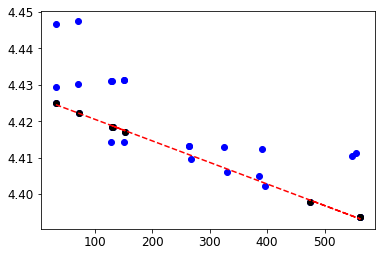

In [128]:
drawTrackToFit(fullRoadInfo,hitRIndex=hitRIndex, hitPhiIndex=hitPhiIndex,color="b")
drawTrackToFit(fittedTrack,hitRIndex=hitRIndex, hitPhiIndex=hitPhiIndex)
drawTrackFit(fittedTrack, "r", hitRIndex=hitRIndex)

In [125]:
drawTrackToFitZR(fullRoadInfo,hitRIndex=hitRIndex,color="b")
drawTrackToFitZR(fittedTrack,hitRIndex=hitRIndex)
drawTrackFitZR(fittedTrack, "r", hitZIndex=hitZIndex)

In [88]:
def removeOverlapDebug(fittedTracks, hitIdsToClean):
    for hitID in hitIdsToClean:
        print(hitID)
        # get lowest chi2 for this hitID   
        maxNHits = 0
        trackIDs = [] #
        for tIndex, trackInfo in enumerate(fittedTracks):
            thisTrackHitIDs = trackInfo[1][0]
            for hIndex, thisHitID in enumerate(thisTrackHitIDs):
                if hitID == thisHitID:
                    thisX2    = trackInfo[-1][hIndex]
                    thisNHits = len(trackInfo[-1])
                    if thisNHits > maxNHits:                        
                        maxNHits = thisNHits
                    trackIDs.append((tIndex,thisNHits,hIndex))
        print(trackIDs)
        # remove hit from other tracsk
        for tIndex in trackIDs:
            if tIndex[1] < maxNHits:
                fittedTracks[int(tIndex[0])][1][0].pop(tIndex[2])

In [217]:
removeOverlapDebug(allFitTracks,nTracksPerHitIter3[nTracksPerHitIter3>1].index)
print(allFitTracks[47])
print(allFitTracks[48])

699.0
[(47, 13, 3), (48, 13, 3)]
706.0
[(47, 13, 10), (48, 13, 10)]
696.0
[(47, 13, 0), (48, 13, 0)]
705.0
[(47, 13, 9), (48, 13, 9)]
704.0
[(47, 13, 8), (48, 13, 8)]
702.0
[(47, 13, 6), (48, 13, 6)]
698.0
[(47, 13, 2), (48, 13, 2)]
707.0
[(47, 13, 11), (48, 13, 11)]
700.0
[(47, 13, 4), (48, 13, 4)]
701.0
[(47, 13, 5), (48, 13, 5)]
703.0
[(47, 13, 7), (48, 13, 7)]
697.0
[(47, 13, 1), (48, 13, 1)]
[[0.004667648962743542, -6.567511410209732e-05, -1.0, 6.2685721751720855, 0.07505316362463922], [[696.0, 697.0, 698.0, 699.0, 700.0, 701.0, 702.0, 703.0, 704.0, 705.0, 706.0, 707.0, 709.0]], 3.1032845232610446, [17.0, 17.0, 18.0, 18.0, 19.0, 19.0, 20.0, 20.0, 21.0, 21.0, 22.0, 22.0, 23.0], [0.38762021705392136, 0.615913714208188, 0.6035208935474351, 0.0034019431240685447, 0.3140138924992366, 0.40523813187321117, 0.13953059696188758, 0.10716992847014954, 0.10786110134277833, 0.10402108739551201, 0.004522592054177002, 0.01847669221887335, 0.2919937325116057]]
[[0.004781523196047517, -6.143650702

In [ ]:
chi2Cut = 1
for unHit in unusedHits:
    #print("New Hit")
    for fT in allFitTracks:
        thisX2 = chi2HitTrack(fT,unHit,hitRIndex=8, hitPhiIndex=9, hitZIndex=3)
        if thisX2 < chi2Cut: 
            #print("match",thisX2)
            #print("old",fT)
            #print("adding",unHit[0],unHit[7],thisX2)
            fT[1][0] = np.append(fT[1][0],unHit[0])
            fT[3] = np.append(fT[3],unHit[7])
            fT[4] = np.append(fT[4],thisX2)
            #print("new",fT)
            unusedHitIDs.remove(unHit[0])
            break
len(unusedHitIDs)

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))

#
#  Tracks
#
plt.figure(1)



X, Y = np.meshgrid(HTFinderPtPhiFine.xBins, HTFinderPtPhiFine.yBins)
cmap = plt.get_cmap('binary')

ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1*curvRange,curvRange)

H = np.array(HTFinderPtPhiFine.HitDB.combinedHitsCounts).T
im = ax.pcolormesh(X, Y, H,cmap=cmap)
fig.colorbar(im, ax=ax)

#recoTracks = HTFinderPtPhiFine.findTracks()
#for rT in recoTracks:
#    recZ0  = rT[0]
#    recQ    = rT[2]
#    recTheta = rT[1]
#
#    ax.plot(recZ0,recTheta,
#            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')

        
plt.show()

In [ ]:
matchedHits = HTFinderZThetaCoarse.getHitsInBin(0,0,recHits)
len(matchedHits)

In [ ]:
my_truth.head(20)

In [ ]:
solnsAll = HTFinderPtPhiFine.getSolutionsFromTracks(allRecoTracks)
score_event(my_truth,solnsAll)

In [ ]:
solnsAll["hit_id"].value_counts()

In [ ]:
matchedHits = HTFinderZThetaCoarse.getHitsInBin(0,0,recHits)
len(matchedHits)

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 75
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)
plt.plot(matchedHits[:,1],matchedHits[:,2],'ro')

fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 500
center = (-1000,0)
ax.set_xlim((center[0]-zoom, center[0]+zoom))
ax.set_ylim((center[1], center[1]+zoom/2))


detGeo.drawDetectorZR(ax,True)

plt.plot(matchedHits[:,3],np.sqrt(matchedHits[:,2]**2+matchedHits[:,1]**2),'ro')

In [ ]:
import time
from HTTrackFinder import HTHitDB
start = time.time()
printTimes = False

HTFinderPtPhiFine = HTTrackFinding(0,2*np.pi,200,-1*curvRange,curvRange,400,
                                   getHTFunction=getHTForTrackFinding,
                                   nLayers=(len(detGeo.layers)+len(detGeo.disks)),
                                   minHitsPerTrack=4)


for iX in range(HTFinderZThetaCoarse.nXBins-1):
    for iY in range(HTFinderZThetaCoarse.nYBins-1):
        startGetHits = time.time()
        
        thisZ0    = HTFinderZThetaCoarse.HitDB.getXCenter(iX)
        thisTheta = HTFinderZThetaCoarse.HitDB.getYCenter(iY) 
        
        thisMatchedHits = HTFinderZThetaCoarse.getHitsInBin(iX,iY,recHits)
        
        HTFinderPtPhiFine.clear()

        #
        # Loop on rec hits
        # 
        for hitInfo in thisMatchedHits:

            hitID  = hitInfo[0]
            hitX   = hitInfo[1]    
            hitY   = hitInfo[2]    
            
            hitVolID = int(hitInfo[4])
            hitLayID = int(hitInfo[5])    
            globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)

            # convert to r and phi
            hitR = np.sqrt(hitX**2 + hitY**2)
            hitPhi = np.arctan2(hitY, hitX)
            if hitPhi<0: hitPhi += 2*np.pi
            
            HTFinderPtPhiFine.addHit(globalLayID, hitID, hitR, hitPhi)  
        
        HTFinderPtPhiFine.combineLayerMaps()
        debug = ((iX == 0) and (iY == 0))
        recoTracks = HTFinderPtPhiFine.findTracks()

        #
        #  Add the Z0 and theta measurements
        #
        for t in recoTracks:
            t[0].append(thisZ0)
            t[0].append(thisTheta)        
        
        allRecoTracks += recoTracks
        
        for rt in recoTracks:
            HTFinderZThetaCoarse.removeHitsFromTrack(rt,removeOverlap=False)
        endRemoveHits = time.time()        
        print("One Iter:",endRemoveHits - startGetHits)     

        print(iX,iY,len(recoTracks),len(thisMatchedHits))

In [ ]:
fig, ax = plt.subplots(1, figsize=(20,10))

#    
# Plot Truth
#
for part in eventParticles:
    # part format (trkI,pt,phi,theta,z0,q,6)
    truePhi = part[2]
    trueQ   = part[5]
    trueRc  = part[1]    
    #eventParticles.append((trkI,pt,phi,q,6))

    ax.plot(truePhi,trueQ*1/trueRc,
            "o",markersize=20,markeredgewidth=1,markeredgecolor='r',markerfacecolor='None')


#
#  Tracks
#
ax.set_xlim(0,2*np.pi)
ax.set_ylim(-1*curvRange,curvRange)
for rT in allRecoTracks:
    recPhi, recCurv, recQ, recZ0, recTheta  = rT[0]

    ax.plot(recPhi,recCurv,
            "s",markersize=20,markeredgewidth=1,markeredgecolor='b',markerfacecolor='None')


        
plt.show()


In [ ]:
solnsAll = HTFinderPtPhiFine.getSolutionsFromTracks(allRecoTracks)
score_event(my_truth,solnsAll)

In [ ]:
matchedHits = HTFinderZThetaCoarse.getHitsInBin(0,0,recHits)
len(matchedHits)

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,10))
zoom = 75
ax.set_xlim((-1*zoom, zoom))
ax.set_ylim((-1*zoom, zoom))

detGeo.drawDetectorXY(ax,True)
plt.plot(matchedHits[:,1],matchedHits[:,2],'ro')

fig, ax = plt.subplots(1, figsize=(10,5))
zoom = 3000
ax.set_xlim((-zoom, zoom))
ax.set_ylim((0, zoom/2))

detGeo.drawDetectorZR(ax,True)

plt.plot(matchedHits[:,3],np.sqrt(matchedHits[:,2]**2+matchedHits[:,1]**2),'ro')

OK now lets do the Fitting

In [ ]:

HTFinderZThetaCoarseFitting = HTTrackFinding(-50,50,2,-4,4,40,getHTFunction=getHT_ZRForTrackingEta,
                                             nLayers=(len(detGeo.layers)+len(detGeo.disks)),
                                             minHitsPerTrack=3)


#
# Loop on rec hits
# 
for hitInfo in recHits:
    
    # (hitID,hitX,hitY,hitZ,hitZ,hitLay,hitPhi)) 
    hitID  = hitInfo[0]
    hitX   = hitInfo[1]    
    hitY   = hitInfo[2]    
    hitZ   = hitInfo[3]        

    hitVolID = int(hitInfo[4])
    hitLayID = int(hitInfo[5])    
    globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)

    # convert to r and phi
    hitR = np.sqrt(hitX**2 + hitY**2)
    HTFinderZThetaCoarseFitting.addHit(globalLayID, hitID, hitZ, hitR,doRangeCut=False)



HTFinderZThetaCoarseFitting.combineLayerMaps()

In [ ]:
import time
from HTTrackFinder import HTHitDB
start = time.time()
printTimes = False

HTFinderPtPhiFine = HTTrackFinding(0,2*np.pi,200,-1*curvRange,curvRange,400,
                                   getHTFunction=getHTForTrackFinding,
                                   nLayers=(len(detGeo.layers)+len(detGeo.disks)),
                                   minHitsPerTrack=5)

allRecoRoads = []
for iX in range(HTFinderZThetaCoarseFitting.nXBins-1):
    for iY in range(HTFinderZThetaCoarseFitting.nYBins-1):
        startGetHits = time.time()
        
        thisZ0    = HTFinderZThetaCoarseFitting.HitDB.getXCenter(iX)
        thisTheta = HTFinderZThetaCoarseFitting.HitDB.getYCenter(iY) 
        
        thisMatchedHits = HTFinderZThetaCoarseFitting.getHitsInBin(iX,iY,recHits)
        
        if len(thisMatchedHits) < 5: continue

        HTFinderPtPhiFine.clear()

        #
        # Loop on rec hits
        # 
        for hitInfo in thisMatchedHits:

            hitID  = hitInfo[0]
            hitX   = hitInfo[1]    
            hitY   = hitInfo[2]    
            
            hitVolID = int(hitInfo[4])
            hitLayID = int(hitInfo[5])    
            globalLayID = detGeo.getGlobalLayerID(hitVolID,hitLayID)

            # convert to r and phi
            hitR = np.sqrt(hitX**2 + hitY**2)
            hitPhi = np.arctan2(hitY, hitX)
            if hitPhi<0: hitPhi += 2*np.pi
            
            HTFinderPtPhiFine.addHit(globalLayID, hitID, hitR, hitPhi)  
        
        HTFinderPtPhiFine.combineLayerMaps()
        recoRoads = HTFinderPtPhiFine.findTracks(overlapLogicFirstHit=False)

        #
        #  Add the Z0 and theta measurements
        #
        for t in recoRoads:
            t[0].append(thisZ0)
            t[0].append(thisTheta)        
        
        allRecoRoads += recoRoads
        
        for rt in recoRoads:
            HTFinderZThetaCoarseFitting.removeHitsFromTrack(rt,removeOverlap=False)
        endRemoveHits = time.time()        
        print("One Iter:",endRemoveHits - startGetHits)     

        print(iX,iY,len(recoRoads),len(thisMatchedHits))

In [ ]:
allRecoRoadsTest = list(allRecoRoads)

In [ ]:
print(len(allRecoRoads))
print(len(allRecoRoadsTest))
print(len(allRecoTracks))

In [ ]:
roadsToRemove = []
for rFirstIndx in range(len(allRecoRoadsTest)):
    if rFirstIndx in roadsToRemove: continue
    thisRoad = allRecoRoadsTest[rFirstIndx]
    for rOtherIndx in range(rFirstIndx,len(allRecoRoadsTest)):
        if rOtherIndx == rFirstIndx: continue
        if thisRoad == allRecoRoadsTest[rOtherIndx]:
            print("kill",rOtherIndx,"b/c of",rFirstIndx)
            roadsToRemove.append(rOtherIndx)
roadsToRemove.sort(reverse=True)
print(roadsToRemove)

In [ ]:
for dup in roadsToRemove:
    allRecoRoadsTest.pop(dup)

In [ ]:
print(len(allRecoRoads))
print(len(allRecoRoadsTest))
print(len(allRecoTracks))

In [ ]:
#print(recHits[:,2])
x2s = np.array(recHits[:,1]**2,dtype=float)
y2s = np.array(recHits[:,2]**2,dtype=float)

Rs = np.sqrt(x2s + y2s)
Phis = np.arctan2(recHits[:,2],recHits[:,1])
Phis[Phis<0] = Phis[Phis<0] +2*np.pi

recHitsNew = np.c_[recHits,Rs,Phis]
recHitsNew[0:10]

In [ ]:
fittedTracks3D = HTFinderZThetaCoarseFitting.fitTracks3D(allRecoRoadsTest,recHitsNew,chi2Cut=5e0,
                                                         hitRIndex=7, hitPhiIndex=8, hitZIndex=3)
print(len(allRecoRoads))
print(len(allRecoRoadsTest))
#print(len(fittedTracks2D))
print(len(fittedTracks3D))

In [ ]:
solnsFitted = HTFinderZThetaCoarseFitting.getSolutionsFromTracks(fittedTracks3D)
nTracksPerHit = solnsFitted["hit_id"].value_counts()

In [ ]:
def printCounts(trackPerHit):
    for i in range(20):
        print(len(trackPerHit[trackPerHit > i]))

printCounts(solnsFitted["hit_id"].value_counts())
multiTperH = nTracksPerHit[nTracksPerHit > 1]

In [ ]:
HTFinderZThetaCoarseFitting.removeOverlap(fittedTracks3D,multiTperH.index)

In [ ]:
solnsCleaned = HTFinderZThetaCoarseFitting.getSolutionsFromTracks(fittedTracks3D)

In [ ]:
printCounts(solnsCleaned["hit_id"].value_counts())


In [ ]:
roadsToRemove = []
for rFirstIndx in range(len(fittedTracks3D)):
    if rFirstIndx in roadsToRemove: continue
    thisRoad = fittedTracks3D[rFirstIndx]
    for rOtherIndx in range(rFirstIndx,len(fittedTracks3D)):
        if rOtherIndx == rFirstIndx: continue
        if thisRoad == fittedTracks3D[rOtherIndx]:
            print("kill",rOtherIndx,"b/c of",rFirstIndx)
            roadsToRemove.append(rOtherIndx)
roadsToRemove.sort(reverse=True)
print(roadsToRemove)

In [ ]:
nTracksPerHitCleaned = solnsCleaned["hit_id"].value_counts()
multiTperHCleaned = nTracksPerHitCleaned[nTracksPerHitCleaned > 1]
multiTperHCleaned

In [ ]:
HTFinderZThetaCoarseFitting.removeOverlap(fittedTracks3D,multiTperHCleaned.index,useNHits=False)

In [ ]:
solnsCleaned2nd = HTFinderZThetaCoarseFitting.getSolutionsFromTracks(fittedTracks3D)

In [ ]:
printCounts(solnsCleaned2nd["hit_id"].value_counts())

In [ ]:
from trackml.score import score_event
score_event(my_truth,solnsCleaned2nd)

In [ ]:
X2Before = []
X2After = []
for f in fittedTracks3D:
    X2Before.append(f[2])
    X2After.append(f[3])
    
#print(X2Before)
plt.hist(X2Before)
plt.show()
plt.hist(X2After)
plt.show()

In [ ]:
len(eventParticles)

In [ ]:
len(fittedTracks3D)